In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

# LeNet Lab
![LeNet Architecture](resources/lenet.png)
Source: Yan LeCun


- the LeNet lab from the convolutional neural networks lesson is a great starting point for building a network to classify traffic signs
- but before you adapt LeNet for the project, let's walk through the lab solution and review what happens on each line


- image above shows original drawing of the LeNet architecture from Yan LeCun's 1998 journal article
- the network takes a 32x32 images input
- then, that image goes through a convolutional layer, C1, followed by a subsampling layer, S2
  - since LeNet was originally designed, subsampling layers have mostly given way to what we now call pooling layers which is actually what we use in this lab
- then there's another sequence of convolutional layer, C3, followed by a pooling layer, S4
- finally, there are three fully connected layers including the output layer at the end
- that's the architecture of LeNet


- the rest of the notebook implements this architecture in TensorFlow

## Lab info

- reprocessing
  - an MNIST image is initially $784$ features (1D)
  - if the data is not normalized from $[0, 255]$ to $[0, 1]$, normalize it
  - we reshape this to $(28, 28, 1)$ (3D), and pad the image with $0$s such that the height and width are $32$ (centers digit further)
  - thus, the input shape going into the first convolutional layer is $32x32x1$


- specs
  - convolution layer 1
    - the output shape should be $28x28x6$
  - activation 1
    - your choice of activation function
  - pooling layer 1
    - the output shape should be $14x14x6$
  - convolution layer 2
    - the output shape should be $10x10x16$
  - activation 2
    - your choice of activation function
  - pooling layer 2
    - the output shape should be $5x5x16$
  - flatten layer
    - flatten the output shape of the final pooling layer such that it's 1D instead of 3D
    - the easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you
  - fully connected layer 1
    - this should have 120 outputs
  - activation 3
    - your choice of activation function
  - fully connected layer 2
    - this should have 84 outputs
  - activation 4
    - your choice of activation function
  - fully connected layer 3
    - this should have 10 outputs


- you'll return the result of the final fully connected layer from the LeNet function

- if implemented correctly you should see output similar to the following:

```python
EPOCH 1 ...
Validation loss = 52.809
Validation accuracy = 0.864

EPOCH 2 ...
Validation loss = 24.749
Validation accuracy = 0.915

EPOCH 3 ...
Validation loss = 17.719
Validation accuracy = 0.930

EPOCH 4 ...
Validation loss = 12.188
Validation accuracy = 0.943

EPOCH 5 ...
Validation loss = 8.935
Validation accuracy = 0.954

EPOCH 6 ...
Validation loss = 7.674
Validation accuracy = 0.956

EPOCH 7 ...
Validation loss = 6.822
Validation accuracy = 0.956

EPOCH 8 ...
Validation loss = 5.451
Validation accuracy = 0.961

EPOCH 9 ...
Validation loss = 4.881
Validation accuracy = 0.964

EPOCH 10 ...
Validation loss = 4.623
Validation accuracy = 0.964

Test loss = 4.726
Test accuracy = 0.962
```

## Load Data

In [2]:
# load the MNIST data set which comes pre-installed with TensorFlow
from tensorflow.examples.tutorials.mnist import input_data

# store the training validation and test sets
mnist = input_data.read_data_sets("MNIST_data/", reshape=False)
X_train, y_train = mnist.train.images, mnist.train.labels
X_validation, y_validation = mnist.validation.images, mnist.validation.labels
X_test, y_test = mnist.test.images, mnist.test.labels

# verify that the number of images in each set matches the number of labels in the same set
assert len(X_train) == len(y_train)
assert len(X_validation) == len(y_validation)
assert len(X_test) == len(y_test)

print()
# print out the shape of one image so that we know what the dimensions of the data are
print("Image Shape: {}".format(X_train[0].shape))
print()
# print out the size of each set
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.

Image Shape: (28, 28, 1)

Training Set

<IPython.core.display.Javascript object>

When we run the code, we see that the training set has 55,000 images. The validation set has 5,000 images and the test set has 10,000 images.

The MNIST data that TensorFlow pre-loads comes as 28x28x1 images.

However, the LeNet architecture only accepts 32x32xC images, where C is the number of color channels.

In order to reformat the MNIST data into a shape that LeNet will accept, we pad the data with two rows of zeros on the top and bottom, and two columns of zeros on the left and right (28+2+2 = 32).

We could do this by using image processing software to scale up each image.But here, we just pad the images with zeroes around the edges. This is much faster and it works well. When we've done, the image shape is 32 by 32 by 1 which is exactly what LeNet takes as input.

In [3]:
import numpy as np

# Pad images with 0s
# transform the 28 by 28 MNIST images into 32 by 32 images that LeNet can process
X_train = np.pad(X_train, ((0, 0), (2, 2), (2, 2), (0, 0)), "constant")
X_validation = np.pad(X_validation, ((0, 0), (2, 2), (2, 2), (0, 0)), "constant")
X_test = np.pad(X_test, ((0, 0), (2, 2), (2, 2), (0, 0)), "constant")

print("Updated Image Shape: {}".format(X_train[0].shape))

Updated Image Shape: (32, 32, 1)


<IPython.core.display.Javascript object>

## Visualize Data

View a sample from the dataset.

0


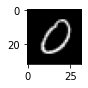

<IPython.core.display.Javascript object>

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# select a random image from the training set and uaw matplotlib to visualize it
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1, 1))
plt.imshow(image, cmap="gray")

# print out the label for that image
print(y_train[index])

## Preprocess Data

Shuffle the training data.

It's important to shuffle the training data, otherwise the ordering of the data might have a huge effect on how well the network trends.

In [5]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

<IPython.core.display.Javascript object>

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

We will use this `EPOCHS` variable, to tell TensorFlow how many times to run our training data through the network. In general, the more EPOCHS, the better our model will train, but also the longer training will take.

Later we'll also use the `BATCH_SIZE` variable to tell TensorFlow how many training images to run through the network at a time. The larger the batch size, the faster our model will train, but our processor may have a memory limit on how large a batch it can run.

In [6]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

<IPython.core.display.Javascript object>

## TODO: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6. The formula for convolutions tells us that the output height equals the input height minus the filter height plus one all divided by the vertical stride.
In this case, that means 32, minus 5, plus 2, all divided by 1, which equals 28. The formula works the same way for the output width, which also equals 28. So our convolutional layer output is 28 by 28 by 6. That's our first convolutional layer.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [7]:
from tensorflow.contrib.layers import flatten


def LeNet(x):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1

    ### LAYER1 ###
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # this layer has 5x5 filter with an input depth of 1, and an output depth of 6
    conv1_W = tf.Variable(
        tf.truncated_normal(shape=(5, 5, 1, 6), mean=mu, stddev=sigma)
    )
    # initialize the bias
    conv1_b = tf.Variable(tf.zeros(6))
    # use the conv2D function to convolve the filter over the images, and we add the bias at the end
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding="VALID") + conv1_b

    # TODO: Activation.
    # activate the output of the convolutional layer, in this case with a ReLU activation function
    conv1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    # pool the output using the 2 by 2 kernel with a 2 by 2 stride, which gives us a pooling output of 14 by 14 by 6
    # the network then runs through another set of convolutional activation and pooling layers, giving an output of 5 by 5 by 16
    conv1 = tf.nn.max_pool(
        conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID"
    )

    ### LAYER2 ###
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(
        tf.truncated_normal(shape=(5, 5, 6, 16), mean=mu, stddev=sigma)
    )
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = (
        tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding="VALID") + conv2_b
    )

    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(
        conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID"
    )

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    # flatten this output into a vector; the length of the vector is 5 times 5 times 16, which equals 400
    fc0 = flatten(conv2)

    ### LAYER3 ###
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    # pass this vector into a fully connected layer, with a width of 120
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b

    # TODO: Activation.
    # apply a ReLU activation to the output of this fully connected layer
    fc1 = tf.nn.relu(fc1)

    ### LAYER4 ###
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    # repeat the pattern again this time with a layer width of 84
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b

    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)

    ### LAYER5 ###
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    # attach a fully connected output layer with a width equal to the number of classes in our label set
    # in this case,we have 10 classes; one for each digit, so the with the the output layer is 10
    # these outputs are also known as our logits, which is what we return from the LeNet function
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84, 10), mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(10))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

<IPython.core.display.Javascript object>

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

In [8]:
# x is a placeholder for a batch of input images (batches)
# initialize the batch size to None, which allows the placeholder to later accept a batch of any size
# and we set the image dimensions to 32 by 32 by 1
x = tf.placeholder(tf.float32, (None, 32, 32, 1))

# y is a placeholder for a batch of output labels
# in this case, our labels come through with sparse variables, which just means that they're integers
# they aren't one-hot encoded yet
y = tf.placeholder(tf.int32, (None))

# one-hot encode the labels
one_hot_y = tf.one_hot(y, 10)

<IPython.core.display.Javascript object>

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

In [9]:
# the learning rate tells TensorFlow how quickly to update the network's weights
rate = 0.001

# pass the input data to the LeNet function to calculate our logits
logits = LeNet(x)

# compare those logits to the ground truth labels and calculate the cross entropy
# cross entropy is just a measure of how different the logits are from the ground truth training labels
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)

# average the cross entropy from all of the training images
loss_operation = tf.reduce_mean(cross_entropy)

# AdamOptimizer uses the Adam algorithm to minimize the loss function similarly to what stochastic gradient descent does
# so it's a good default choice for an optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=rate)

# run the minimize function on the optimizer which uses backpropagation to update the network and minimize our training loss
training_operation = optimizer.minimize(loss_operation)

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



<IPython.core.display.Javascript object>

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [10]:
# measure whether a given prediction is correct by comparing the logit prediction to the one-hot encoded ground truth label
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))

# calculate the model's overall accuracy by averaging the individual prediction accuracies
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# these two lines above are the entire evaluation pipeline

saver = tf.train.Saver()


# this function takes a dataset as input, sets some initial variables, and then batches the dataset and runs it through the evaluation pipeline
# the evaluate function averages the accuracy of each batch to calculate the total accuracy of the model
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = (
            X_data[offset : offset + BATCH_SIZE],
            y_data[offset : offset + BATCH_SIZE],
        )
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += accuracy * len(batch_x)
    return total_accuracy / num_examples

<IPython.core.display.Javascript object>

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [11]:
# create the TensorFlow session and initialize the variables
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    print()
    # train over whatever number of epochs has been set in the EPOCHS hyperparameter
    for i in range(EPOCHS):
        # at the beginning of each epoch, we shuffle our training data to ensure that our training isn't biased by the order of the images
        X_train, y_train = shuffle(X_train, y_train)

        # break our training data into batches and train the model on each batch
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

        # at the end of each epoch, we evaluate the model on our validation data
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i + 1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

    saver.save(sess, "./lenet")
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.967

EPOCH 2 ...
Validation Accuracy = 0.982

EPOCH 3 ...
Validation Accuracy = 0.985

EPOCH 4 ...
Validation Accuracy = 0.987

EPOCH 5 ...
Validation Accuracy = 0.987

EPOCH 6 ...
Validation Accuracy = 0.985

EPOCH 7 ...
Validation Accuracy = 0.986

EPOCH 8 ...
Validation Accuracy = 0.988

EPOCH 9 ...
Validation Accuracy = 0.989

EPOCH 10 ...
Validation Accuracy = 0.988

Model saved


<IPython.core.display.Javascript object>

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Remember, we should only run the model on the test dataset one time once we are completely done with training.
Otherwise, we would be using the test dataset to choose the best model and then the test dataset wouldn't provide
a good estimate of how well the model would do in the real world.
Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

In [12]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint("."))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.989


<IPython.core.display.Javascript object>